In [3]:

import os
import pandas as pd
# import numpy as np
from matplotlib import pyplot as plt
from pmdarima import auto_arima
from prophet import Prophet

os.getcwd()
os.chdir('/Users/harsha/Code/forecaster/')


from Forecaster import *
from params import *

In [4]:
model_args = {'model_params': pmdarima_model_params,
              'time_windows': start_end_dates,
              'model_name': 'pmdarima',
              'model_type': 'pmdarima'}

In [5]:
df = pd.read_csv('data/AirPassengers.csv')
df.columns = ['ds', 'y']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
# Create an instance of the Forecaster class
f = Forecaster(data=df, **model_args)
f.preprocess_data()

In [8]:
df_train, df_test = f.train_test_split()

In [9]:
df_train

,y
ds,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1958-07-01,491.0
1958-08-01,505.0
1958-09-01,404.0


In [10]:
df_test

,y
ds,
1958-12-01,337.0
1959-01-01,360.0
1959-02-01,342.0
1959-03-01,406.0
1959-04-01,396.0
1959-05-01,420.0
1959-06-01,472.0
1959-07-01,548.0
1959-08-01,559.0


In [11]:
my_forecast = f.make_forecast()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=799.556, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=800.975, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=798.158, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=798.620, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=796.494, Time=0.01 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=798.234, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=798.255, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=797.825, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=796.886, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=799.807, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=798.494, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.222 seconds


In [12]:
my_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 1961-01-31 to 1961-11-30
Freq: M
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   yhat      11 non-null     float64
 1   ci_lower  11 non-null     float64
 2   ci_upper  11 non-null     float64
dtypes: float64(3)
memory usage: 352.0 bytes


In [13]:
f.model.conf_int()

array([[-4.51637694e-01, -1.63580035e-01],
       [ 1.08351177e+02,  1.65670404e+02]])

In [14]:
df_train.append(df_test)

,y
ds,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


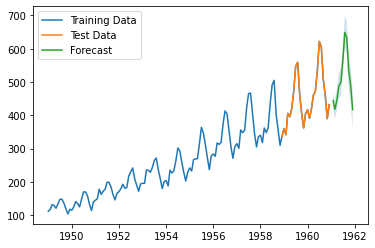

In [15]:
f.plot_forecast()

In [16]:
f.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -508.197
Date:                            Thu, 13 Jan 2022   AIC                           1020.393
Time:                                    13:32:19   BIC                           1026.144
Sample:                                         0   HQIC                          1022.730
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3076      0.073     -4.186      0.000      -0.452      -0.164
sigma2       137.0108     14.623      9.370      0.000     108.351     165.670
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.75
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                             0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
df_train['y_arima'] = f.model.predict_in_sample(df_train['y'], end= 118, return_conf_int=False)
# f.model.predict_in_sample(return_conf_int=False)

/var/folders/yh/lghzy8cj2jl1yc9q_zqh13000000gn/T/ipykernel_46324/1884020183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_arima'] = f.model.predict_in_sample(df_train['y'], end= 118, return_conf_int=False)


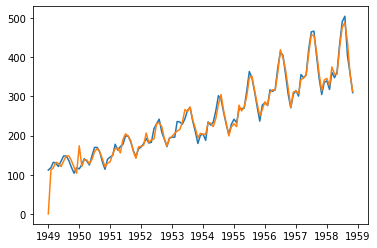

In [18]:
plt.plot(df_train, label='Training Data and In Sample Prediction')

In [19]:
df_train

,y,y_arima
ds,,
1949-01-01,112.0,0.000000
1949-02-01,118.0,111.997393
1949-03-01,132.0,118.000522
1949-04-01,129.0,131.999188
1949-05-01,121.0,129.000389
...,...,...
1958-07-01,491.0,476.461956
1958-08-01,505.0,489.001085
1958-09-01,404.0,438.308694


In [20]:
?f.model